In [37]:
#Importing the Required Packages for the Model.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
#Loading the MNIST Dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
#Printing the shapes

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


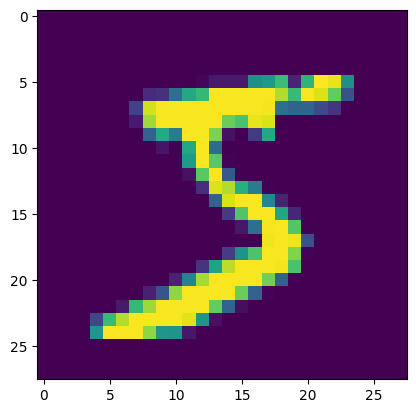

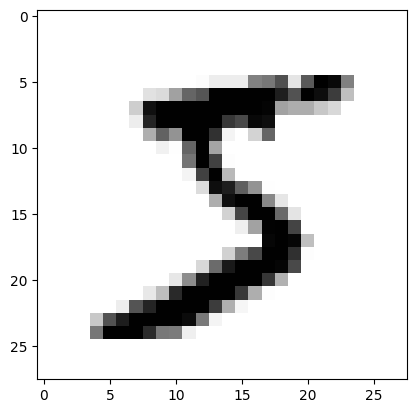

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [41]:
#Normalizing the training and testing data using TensorFlow

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the shape of your input data (e.g., for grayscale images with dimensions 28x28)
shape = (28, 28, 1)

model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=shape))
model.add(MaxPooling2D((2, 2)))  # First MaxPooling layer
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # Second MaxPooling layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [43]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Training the model
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1908 - accuracy: 0.9402
Epoch 2/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0745 - accuracy: 0.9770
Epoch 3/3
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0538 - accuracy: 0.9820


In [44]:
#Printing the Accuracy level
loss, accuracy= model.evaluate(x_test, y_test)
accuracy*100

313/313 [==============================] - 3s 9ms/step - loss: 0.0372 - accuracy: 0.9878


98.78000020980835

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1200)             

In [46]:
#Saving the model
model.save('RequiredModel')

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array

# List of image names
image_names = ['/content/N0.png','/content/N11.png', '/content/N2.png', '/content/N3.png', '/content/N4.png', '/content/N5.png', '/content/N6.png', '/content/N7.png', '/content/N8.png', '/content/N9.png']
k=0
for image_name in image_names:
    # Loading the image
    img = cv.imread(image_name)

    # Checking if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load {image_name}")
        continue

    # Converting to grayscale
    img = img[:,:,0]

    # Resizing the image to match the model's input shape (28, 28)
    img = cv.resize(img, (28, 28))

    # Inverting the image
    img = np.invert(np.array([img]))

    # Predict using the model
    img = img_to_array(img)
    img = img.reshape(1, 28, 28)
    prediction = model.predict(img)

    # Display the result
    print(f'True number of the given input image is: {k}')
    k+=1
    print(f'The result for {image_name} is probably: {np.argmax(prediction)}')


1/1 [==============================] - 0s 80ms/step
True number of the given input image is: 0
The result for /content/N0.png is probably: 0
1/1 [==============================] - 0s 21ms/step
True number of the given input image is: 1
The result for /content/N11.png is probably: 1
1/1 [==============================] - 0s 22ms/step
True number of the given input image is: 2
The result for /content/N2.png is probably: 2
1/1 [==============================] - 0s 24ms/step
True number of the given input image is: 3
The result for /content/N3.png is probably: 3
1/1 [==============================] - 0s 25ms/step
True number of the given input image is: 4
The result for /content/N4.png is probably: 4
1/1 [==============================] - 0s 23ms/step
True number of the given input image is: 5
The result for /content/N5.png is probably: 5
1/1 [==============================] - 0s 24ms/step
True number of the given input image is: 6
The result for /content/N6.png is probably: 6
1/1 [=======